# BAG 建筑足迹数据预处理

## 安装高版本的geopandas和shapely

In [2]:
%pip install geopandas~=0.12.0 shapely~=2.0.1

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
import geopandas as gpd
gpd.__version__

'0.12.2'

In [3]:
# 查看数据
gpkg_file = "../data/ZIP/bag-light.gpkg"
gdf_BAG = gpd.read_file(gpkg_file, rows=10) # rows指代读取前row行
gdf_BAG

,rdf_seealso,identificatie,bouwjaar,status,gebruiksdoel,oppervlakte_min,oppervlakte_max,aantal_verblijfsobjecten,geometry
0,http://bag.basisregistraties.overheid.nl/bag/i...,0003100000117485,1991,Pand in gebruik,woonfunctie,77.0,79.0,14,"POLYGON ((254059.737 593504.637, 254059.227 59..."
1,http://bag.basisregistraties.overheid.nl/bag/i...,0003100000117486,1970,Sloopvergunning verleend,woonfunctie,107.0,107.0,21,"POLYGON ((253822.701 593455.662, 253826.352 59..."
2,http://bag.basisregistraties.overheid.nl/bag/i...,0003100000117487,1994,Pand in gebruik,NaN,NaN,NaN,0,"POLYGON ((249943.307 593511.272, 249948.555 59..."
3,http://bag.basisregistraties.overheid.nl/bag/i...,0003100000117489,1989,Pand in gebruik,overige gebruiksfunctie,8.0,8.0,1,"POLYGON ((252002.100 593526.230, 252000.730 59..."
4,http://bag.basisregistraties.overheid.nl/bag/i...,0003100000117490,1925,Pand in gebruik,woonfunctie,109.0,109.0,1,"POLYGON ((253227.559 593526.493, 253231.617 59..."
5,http://bag.basisregistraties.overheid.nl/bag/i...,0003100000117491,1930,Pand in gebruik,industriefunctie,306.0,306.0,1,"POLYGON ((253311.271 593541.787, 253310.818 59..."
6,http://bag.basisregistraties.overheid.nl/bag/i...,0003100000117492,1970,Pand in gebruik,"kantoorfunctie,woonfunctie",53.0,89.0,29,"POLYGON ((253909.583 593544.124, 253985.736 59..."
7,http://bag.basisregistraties.overheid.nl/bag/i...,0003100000117493,1997,Pand in gebruik,"sportfunctie,winkelfunctie",465.0,4000.0,8,"POLYGON ((254339.978 593500.000, 254338.865 59..."
8,http://bag.basisregistraties.overheid.nl/bag/i...,0003100000117494,1970,Pand in gebruik,woonfunctie,89.0,89.0,28,"POLYGON ((253822.613 593551.143, 253898.852 59..."
9,http://bag.basisregistraties.overheid.nl/bag/i...,0003100000117495,2002,Pand in gebruik,woonfunctie,90.0,145.0,19,"POLYGON ((252834.990 593531.368, 252834.924 59..."


In [4]:
# 查看列名
gdf_BAG.columns

Index(['rdf_seealso', 'identificatie', 'bouwjaar', 'status', 'gebruiksdoel',
       'oppervlakte_min', 'oppervlakte_max', 'aantal_verblijfsobjecten',
       'geometry'],
      dtype='object')

翻译为：
rdf_seealso：rdf参考（这可能是一个关于RDF的参考链接或相关信息）
identificatie：标识
bouwjaar：建造年份
status：状态
gebruiksdoel：使用目的
oppervlakte_min：最小面积
oppervlakte_max：最大面积
aantal_verblijfsobjecten：住宅对象数量
geometry：几何

In [5]:
# TODO 将列名翻译为英文

In [6]:
# 查看数据的空间参考信息
gdf_BAG.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

<Axes: >

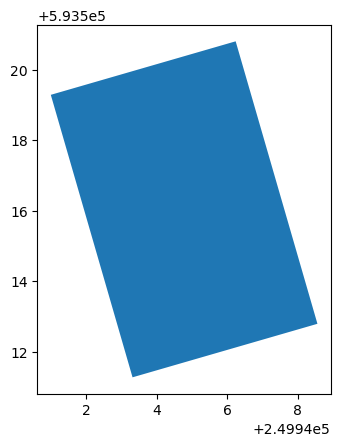

In [7]:
# 绘制数据
gdf_BAG.iloc[2:3, :].plot()

## 2.仅导出阿姆斯特丹的建筑足迹，数据太大，我们用arcgispro来处理

## 3.我们重新读取阿姆斯特丹的建筑足迹

In [8]:
gdb = "..\\5-ArcgisPro工程\\建筑风格和年代深度学习.gdb"
gdf = gpd.read_file(gdb, layer='Amsterdam_buildings_Project', rows=5000) 
print(len(gdf))
gdf.head()

5000


,rdf_seealso,identificatie,bouwjaar,status,gebruiksdoel,oppervlakte_min,oppervlakte_max,aantal_verblijfsobjecten,geom_Length,geom_Area,geometry
0,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061709,2007,Pand in gebruik,woonfunctie,331.0,331.0,1,60.067413,173.201627,"MULTIPOLYGON (((635512.808 5802343.021, 635518..."
1,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061225,1923,Pand in gebruik,woonfunctie,84.0,84.0,1,28.671057,48.016138,"MULTIPOLYGON (((628083.847 5808893.547, 628087..."
2,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061228,2004,Pand in gebruik,woonfunctie,93.0,128.0,2,38.826189,80.168377,"MULTIPOLYGON (((635718.103 5802400.059, 635709..."
3,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012062224,1916,Pand in gebruik,woonfunctie,50.0,80.0,4,36.203712,61.107085,"MULTIPOLYGON (((632084.702 5803319.551, 632084..."
4,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012063200,1965,Pand in gebruik,overige gebruiksfunctie,1.0,1.0,1,18.999679,19.500827,"MULTIPOLYGON (((628012.652 5798762.544, 628013..."


## ！！！注意：以下的处理分文两种方法，一种是用geopandas，一种是用ArcgisPro

## 4.用geopandas处理建筑并获取中心点

### 4.1 简化多边形的方法
简化多边形的方法是为了防止多边形的顶点过多，导致计算量过大，从而影响计算效率。简化多边形的方法有很多，这里我们使用simplify。

object.simplify(tolerance, preserve_topology=True) 是一个常用于地理信息系统 (GIS) 中的方法，用于简化形状对象（如多边形或折线）。这个方法的目的是减少构成形状的点的数量，同时尽可能保留其原始形状。这在几种情况下特别有用，例如减少存储需求、提高绘图性能或进行一般化处理以进行高层次的分析。

让我们详细了解这个方法的参数和它们是如何影响简化过程的：

- tolerance:

这是一个数值参数，指定了简化操作的容差。容差是指形状可以被简化的最大距离，即任何点都不会被移动超过这个距离。这个值越小，结果形状就越接近原始形状；这个值越大，简化就更激进，可能导致形状的显著变化。
容差通常以地图单位为单位（例如，米、英尺等），这取决于您的地图或空间数据的坐标系统。

- preserve_topology:

False 使用更快的算法，但可能会产生自相交或其他无效的几何图形。

In [9]:
# 简化前,输出多个多边形
import random
# s = random.randint(0, len(gdf))
sample = 3255

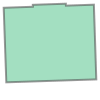

In [10]:
gdf.loc[sample, "geometry"]

In [11]:
gdf.loc[sample, "geometry"].geom_type, type(gdf.loc[sample, "geometry"])

('MultiPolygon', shapely.geometry.multipolygon.MultiPolygon)

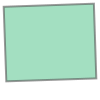

In [12]:
# 简化后
tolerance_m = 1
gdf.loc[sample, "geometry"].simplify(tolerance=tolerance_m, preserve_topology=True) # gdf.geometry[s]

In [13]:
type(gdf.geometry)

geopandas.geoseries.GeoSeries

In [12]:
# 可以直接对gdf进行简化
s = gdf.geometry.simplify(tolerance=tolerance_m, preserve_topology=False)
s

0       POLYGON ((635512.808 5802343.021, 635518.461 5...
1       POLYGON ((628083.847 5808893.547, 628089.158 5...
2       POLYGON ((635718.103 5802400.059, 635709.565 5...
3       POLYGON ((632084.702 5803319.551, 632084.825 5...
4       POLYGON ((628012.652 5798762.544, 628013.017 5...
                              ...                        
4995    POLYGON ((627557.513 5802131.532, 627564.453 5...
4996    POLYGON ((627352.994 5801265.341, 627354.145 5...
4997    POLYGON ((628052.681 5798807.828, 628053.600 5...
4998    POLYGON ((627541.906 5802832.051, 627537.717 5...
4999    POLYGON ((631845.468 5803210.904, 631845.794 5...
Length: 5000, dtype: geometry

In [13]:
gdf_simplify = gdf.copy()
gdf_simplify['geometry'] = s
gdf_simplify

,rdf_seealso,identificatie,bouwjaar,status,gebruiksdoel,oppervlakte_min,oppervlakte_max,aantal_verblijfsobjecten,geom_Length,geom_Area,geometry
0,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061709,2007,Pand in gebruik,woonfunctie,331.0,331.0,1,60.067413,173.201627,"POLYGON ((635512.808 5802343.021, 635518.461 5..."
1,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061225,1923,Pand in gebruik,woonfunctie,84.0,84.0,1,28.671057,48.016138,"POLYGON ((628083.847 5808893.547, 628089.158 5..."
2,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061228,2004,Pand in gebruik,woonfunctie,93.0,128.0,2,38.826189,80.168377,"POLYGON ((635718.103 5802400.059, 635709.565 5..."
3,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012062224,1916,Pand in gebruik,woonfunctie,50.0,80.0,4,36.203712,61.107085,"POLYGON ((632084.702 5803319.551, 632084.825 5..."
4,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012063200,1965,Pand in gebruik,overige gebruiksfunctie,1.0,1.0,1,18.999679,19.500827,"POLYGON ((628012.652 5798762.544, 628013.017 5..."
...,...,...,...,...,...,...,...,...,...,...,...
4995,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012152755,1901,Pand in gebruik,woonfunctie,126.0,348.0,2,47.194270,118.141837,"POLYGON ((627557.513 5802131.532, 627564.453 5..."
4996,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012150365,1931,Pand in gebruik,woonfunctie,112.0,160.0,4,56.233363,180.862245,"POLYGON ((627352.994 5801265.341, 627354.145 5..."
4997,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012151853,1962,Pand in gebruik,woonfunctie,158.0,158.0,1,39.725985,77.562960,"POLYGON ((628052.681 5798807.828, 628053.600 5..."
4998,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012152298,1877,Pand in gebruik,woonfunctie,518.0,518.0,1,65.113810,187.508971,"POLYGON ((627541.906 5802832.051, 627537.717 5..."


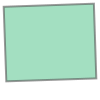

In [14]:
gdf_simplify.loc[sample, "geometry"]

### 4.2 获取中心点


#### 获取中心点的原理

'coords = polygon.exterior.coords'

您可以使用len(polygon.exterior.coords)找到该对象的长度并可以像列表一样索引对象。 例如，要获取第一个顶点，请使用polygon.interiors[0].coords。请注意，第一个点和最后一个点是相同的。 如果要包含没有重复点的顶点的列表，请使用polygon.interiors[0].coords[:-1]。

In [15]:
# 转换多边形的边界为线性环
linear_ring = gdf_simplify.loc[sample, "geometry"].exterior

# 将坐标转换为一个列表，每个元素都是一个坐标对 (x, y)
coords_list = list(linear_ring.coords)
print(len(coords_list), coords_list)

5 [(632140.1681000004, 5803521.2783), (632140.5662000002, 5803509.002), (632125.7775999997, 5803508.522), (632125.3492999999, 5803520.7722), (632140.1681000004, 5803521.2783)]


可以看到第一个点和最后一个点是相同的

In [16]:
from shapely.geometry import Point
# 初始化列表，用于存储每条边的端点
mid_points = []

# 遍历坐标列表中的点，每两个点组成线段的两个端点
for i in range(len(coords_list) - 1):  # 减1，因为我们回到了起始点，所以最后一个点不需要形成新的线段
    # 获取线段的端点
    point1 = coords_list[i]
    point2 = coords_list[i + 1]

    # 计算中点的坐标
    mid_x = (point1[0] + point2[0]) / 2.0
    mid_y = (point1[1] + point2[1]) / 2.0

    # 返回中点
    mid_point = Point(mid_x, mid_y)

    mid_points.append(mid_point)


print(len(mid_points), mid_points)

4 [<POINT (632140.367 5803515.14)>, <POINT (632133.172 5803508.762)>, <POINT (632125.563 5803514.647)>, <POINT (632132.759 5803521.025)>]


#### 将中心点构造成dataframe

In [17]:
# 将中心点构造成dataframe
points = gpd.GeoDataFrame(geometry=mid_points)

# 为 GeoDataFrame 设置坐标参考系统（CRS）如果您知道它的话
points.crs =  gdf_simplify.crs

In [18]:
points

,geometry
0,POINT (632140.367 5803515.140)
1,POINT (632133.172 5803508.762)
2,POINT (632125.563 5803514.647)
3,POINT (632132.759 5803521.025)


<Axes: >

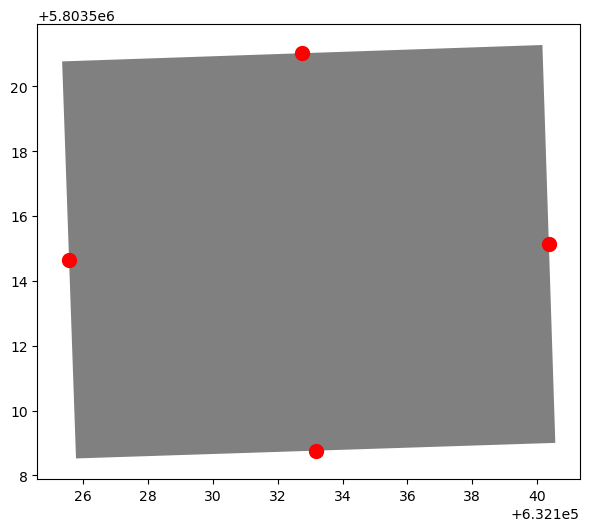

In [19]:
# 绘制原始多边形和简化后的多边形
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 7))

# 绘制原始多边形。我们通过将 'loc' 结果转换为一个新的 GeoDataFrame 来确保 'plot' 方法的可用性。
# 'loc' 通常返回一个 Series 或单个值，但我们需要一个 GeoDataFrame 来使用 'plot' 方法。
gdf_simplify.loc[[sample]].plot(ax=ax, facecolor='gray') #注意，这里用双括号来确保返回一个 DataFrame

# 绘制中点
points.plot(ax=ax, color='red', markersize=100)

### 优化代码
- 1.使用函数
- 2.使用geopandas的apply函数
- 3.处理MultiPolygon


In [20]:
import geopandas as gpd
from shapely.geometry import Point, MultiPoint, Polygon, MultiPolygon

def calculate_midpoints(geometry):
    """
    计算Polygon的每条边的中点或MultiPolygon中每个Polygon的中点。
    """
    midpoints = []

    def midpoint_for_polygon(polygon):
        # 为单个多边形计算中点
        coords = polygon.exterior.coords
        for i in range(len(coords)-1):
            mid_x = (coords[i][0] + coords[i + 1][0]) / 2.0
            mid_y = (coords[i][1] + coords[i + 1][1]) / 2.0
            midpoints.append(Point(mid_x, mid_y))

    if isinstance(geometry, Polygon):
        midpoint_for_polygon(geometry)
    elif isinstance(geometry, MultiPolygon):
        # 对于MultiPolygons，我们需要遍历每个多边形。
        for poly in geometry.geoms:  # 在这里，我们使用.geoms属性进行迭代。geoms属性返回它包含的Polygon实例。
            midpoint_for_polygon(poly)

    return MultiPoint(midpoints)

# 应用函数并创建一个包含中点的新GeoDataFrame
gdf_simplify['midpoints'] = gdf_simplify.geometry.apply(calculate_midpoints)



In [21]:
gdf_points = gdf_simplify.copy()
# gdf_points = gdf_points.explode()  # 将 MultiPoint 转换为单个点
gdf_points.head()
# gdf_points = gdf_points.set_geometry('midpoints')

,rdf_seealso,identificatie,bouwjaar,status,gebruiksdoel,oppervlakte_min,oppervlakte_max,aantal_verblijfsobjecten,geom_Length,geom_Area,geometry,midpoints
0,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061709,2007,Pand in gebruik,woonfunctie,331.0,331.0,1,60.067413,173.201627,"POLYGON ((635512.808 5802343.021, 635518.461 5...","MULTIPOINT (635515.634 5802340.714, 635515.929..."
1,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061225,1923,Pand in gebruik,woonfunctie,84.0,84.0,1,28.671057,48.016138,"POLYGON ((628083.847 5808893.547, 628089.158 5...","MULTIPOINT (628086.502 5808897.184, 628091.310..."
2,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061228,2004,Pand in gebruik,woonfunctie,93.0,128.0,2,38.826189,80.168377,"POLYGON ((635718.103 5802400.059, 635709.565 5...","MULTIPOINT (635713.834 5802394.859, 635707.263..."
3,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012062224,1916,Pand in gebruik,woonfunctie,50.0,80.0,4,36.203712,61.107085,"POLYGON ((632084.702 5803319.551, 632084.825 5...","MULTIPOINT (632084.764 5803318.113, 632078.555..."
4,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012063200,1965,Pand in gebruik,overige gebruiksfunctie,1.0,1.0,1,18.999679,19.500827,"POLYGON ((628012.652 5798762.544, 628013.017 5...","MULTIPOINT (628012.834 5798759.299, 628011.519..."


In [22]:
gdf_points = gdf_points.set_geometry('midpoints')
gdf_points

,rdf_seealso,identificatie,bouwjaar,status,gebruiksdoel,oppervlakte_min,oppervlakte_max,aantal_verblijfsobjecten,geom_Length,geom_Area,geometry,midpoints
0,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061709,2007,Pand in gebruik,woonfunctie,331.0,331.0,1,60.067413,173.201627,"POLYGON ((635512.808 5802343.021, 635518.461 5...","MULTIPOINT (635515.634 5802340.714, 635515.929..."
1,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061225,1923,Pand in gebruik,woonfunctie,84.0,84.0,1,28.671057,48.016138,"POLYGON ((628083.847 5808893.547, 628089.158 5...","MULTIPOINT (628086.502 5808897.184, 628091.310..."
2,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061228,2004,Pand in gebruik,woonfunctie,93.0,128.0,2,38.826189,80.168377,"POLYGON ((635718.103 5802400.059, 635709.565 5...","MULTIPOINT (635713.834 5802394.859, 635707.263..."
3,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012062224,1916,Pand in gebruik,woonfunctie,50.0,80.0,4,36.203712,61.107085,"POLYGON ((632084.702 5803319.551, 632084.825 5...","MULTIPOINT (632084.764 5803318.113, 632078.555..."
4,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012063200,1965,Pand in gebruik,overige gebruiksfunctie,1.0,1.0,1,18.999679,19.500827,"POLYGON ((628012.652 5798762.544, 628013.017 5...","MULTIPOINT (628012.834 5798759.299, 628011.519..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012152755,1901,Pand in gebruik,woonfunctie,126.0,348.0,2,47.194270,118.141837,"POLYGON ((627557.513 5802131.532, 627564.453 5...","MULTIPOINT (627560.983 5802124.109, 627561.142..."
4996,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012150365,1931,Pand in gebruik,woonfunctie,112.0,160.0,4,56.233363,180.862245,"POLYGON ((627352.994 5801265.341, 627354.145 5...","MULTIPOINT (627353.569 5801258.764, 627348.687..."
4997,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012151853,1962,Pand in gebruik,woonfunctie,158.0,158.0,1,39.725985,77.562960,"POLYGON ((628052.681 5798807.828, 628053.600 5...","MULTIPOINT (628053.141 5798801.204, 628050.855..."
4998,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012152298,1877,Pand in gebruik,woonfunctie,518.0,518.0,1,65.113810,187.508971,"POLYGON ((627541.906 5802832.051, 627537.717 5...","MULTIPOINT (627539.812 5802830.984, 627539.062..."


In [23]:
gdf_points.geometry

0       MULTIPOINT (635515.634 5802340.714, 635515.929...
1       MULTIPOINT (628086.502 5808897.184, 628091.310...
2       MULTIPOINT (635713.834 5802394.859, 635707.263...
3       MULTIPOINT (632084.764 5803318.113, 632078.555...
4       MULTIPOINT (628012.834 5798759.299, 628011.519...
                              ...                        
4995    MULTIPOINT (627560.983 5802124.109, 627561.142...
4996    MULTIPOINT (627353.569 5801258.764, 627348.687...
4997    MULTIPOINT (628053.141 5798801.204, 628050.855...
4998    MULTIPOINT (627539.812 5802830.984, 627539.062...
4999    MULTIPOINT (631845.631 5803207.247, 631843.157...
Name: midpoints, Length: 5000, dtype: geometry

In [24]:
gdf_points = gdf_points[["identificatie", "bouwjaar", "midpoints", "geometry"]]
gdf_points

,identificatie,bouwjaar,midpoints,geometry
0,0363100012061709,2007,"MULTIPOINT (635515.634 5802340.714, 635515.929...","POLYGON ((635512.808 5802343.021, 635518.461 5..."
1,0363100012061225,1923,"MULTIPOINT (628086.502 5808897.184, 628091.310...","POLYGON ((628083.847 5808893.547, 628089.158 5..."
2,0363100012061228,2004,"MULTIPOINT (635713.834 5802394.859, 635707.263...","POLYGON ((635718.103 5802400.059, 635709.565 5..."
3,0363100012062224,1916,"MULTIPOINT (632084.764 5803318.113, 632078.555...","POLYGON ((632084.702 5803319.551, 632084.825 5..."
4,0363100012063200,1965,"MULTIPOINT (628012.834 5798759.299, 628011.519...","POLYGON ((628012.652 5798762.544, 628013.017 5..."
...,...,...,...,...
4995,0363100012152755,1901,"MULTIPOINT (627560.983 5802124.109, 627561.142...","POLYGON ((627557.513 5802131.532, 627564.453 5..."
4996,0363100012150365,1931,"MULTIPOINT (627353.569 5801258.764, 627348.687...","POLYGON ((627352.994 5801265.341, 627354.145 5..."
4997,0363100012151853,1962,"MULTIPOINT (628053.141 5798801.204, 628050.855...","POLYGON ((628052.681 5798807.828, 628053.600 5..."
4998,0363100012152298,1877,"MULTIPOINT (627539.812 5802830.984, 627539.062...","POLYGON ((627541.906 5802832.051, 627537.717 5..."


In [25]:
gdf2 = gdf_points.copy()

In [27]:
gdf_points = gdf_points[["identificatie", "bouwjaar", "midpoints"]].rename(columns={'midpoints': 'geometry'})

In [28]:
gdf_points.head()

,identificatie,bouwjaar,geometry
0,0363100012061709,2007,"MULTIPOINT (635515.634 5802340.714, 635515.929..."
1,0363100012061225,1923,"MULTIPOINT (628086.502 5808897.184, 628091.310..."
2,0363100012061228,2004,"MULTIPOINT (635713.834 5802394.859, 635707.263..."
3,0363100012062224,1916,"MULTIPOINT (632084.764 5803318.113, 632078.555..."
4,0363100012063200,1965,"MULTIPOINT (628012.834 5798759.299, 628011.519..."


In [29]:
# 导出为GeoJSON
gdf_points.to_file("../data/output/Ame_gdf_points.shp", engine='pyogrio', driver='ESRI Shapefile')

C:\Users\hncdj\AppData\Local\Temp\ipykernel_28244\1247664513.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_points.to_file("../data/output/Ame_gdf_points.shp", engine='pyogrio', driver='ESRI Shapefile')
C:\Users\hncdj\anaconda3\envs\dl\Lib\site-packages\pyogrio\raw.py:456: RuntimeWarning: Normalized/laundered field name: 'identificatie' to 'identifica'
  ogr_write(


### 4.3 找到距离道路最近的点


我们要利用shapely计算距离，但是我们的road要素是整个地区的线要素，我们需要裁剪到到我们的建筑物的外围。方便计算。



In [128]:
# 读取道路
road = gpd.read_file(r"..\5-ArcgisPro工程\Amsterdam_road.gpkg", layer="edges")
road.head()

,u,v,key,osmid,highway,oneway,reversed,length,bridge,name,...,from,to,lanes,width,ref,tunnel,access,junction,est_width,geometry
0,0,1,0,"[38297120, 7372610, 38297119]",unclassified,False,True,42.497,yes,"['Joes Kloppenburgbrug', 'Oude Spiegelstraat']",...,1,0,,,,,,,,"LINESTRING (628519.029 5803892.976, 628528.888..."
1,0,2,0,7372614,residential,True,False,225.577,,Singel,...,0,2,,,,,,,,"LINESTRING (628561.488 5803889.299, 628579.347..."
2,0,3319,0,562720340,residential,True,False,156.694,,Singel,...,3319,0,,,,,,,,"LINESTRING (628546.332 5803733.252, 628548.060..."
3,1,3321,0,7372587,unclassified,True,False,45.001,,Oude Spiegelstraat,...,1,3321,,,,,,,,"LINESTRING (628519.029 5803892.976, 628474.052..."
4,1,3318,0,7372721,residential,True,False,164.154,,Singel,...,1,3318,,,,,,,,"LINESTRING (628519.029 5803892.976, 628510.468..."


In [129]:
road = road.to_crs(gdf2.crs)[["geometry"]].dropna()

In [130]:
road

,geometry
0,"LINESTRING (628519.029 5803892.976, 628528.888..."
1,"LINESTRING (628561.488 5803889.299, 628579.347..."
2,"LINESTRING (628546.332 5803733.252, 628548.060..."
3,"LINESTRING (628519.029 5803892.976, 628474.052..."
4,"LINESTRING (628519.029 5803892.976, 628510.468..."
...,...
12458,"LINESTRING (637324.721 5802798.724, 637323.930..."
12459,"LINESTRING (626262.130 5806922.087, 626264.124..."
12460,"LINESTRING (626408.706 5806823.259, 626385.637..."
12461,"LINESTRING (626262.130 5806922.087, 626264.654..."


<Axes: >

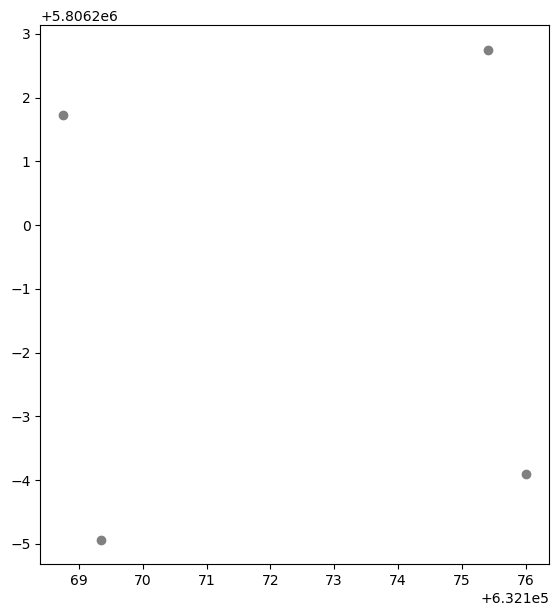

In [216]:
# 绘制原始多边形和简化后的多边形
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 7))

# 绘制原始多边形。我们通过将 'loc' 结果转换为一个新的 GeoDataFrame 来确保 'plot' 方法的可用性。
# 'loc' 通常返回一个 Series 或单个值，但我们需要一个 GeoDataFrame 来使用 'plot' 方法。
gdf2.loc[[sample]].plot(ax=ax, facecolor='gray') #注意，这里用双括号来确保返回一个 DataFrame
# 
# # 绘制中点
# road.plot(ax=ax, color='red', markersize=100)

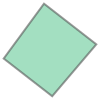

In [141]:
sample = random.randint(0, len(gdf2))
gdf2.loc[sample, "geometry"]

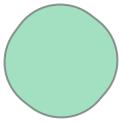

In [156]:
# 获取建筑物外轮廓并扩展一定距离
gdf2.loc[sample, "geometry"].buffer(50)

In [157]:
gdf2.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [158]:
## 裁剪道路
road_clip = road.geometry.intersection(gdf2.loc[sample, "geometry"].buffer(50))

C:\Users\hncdj\anaconda3\envs\dl\Lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


In [159]:
road_clip.dropna()

0        LINESTRING Z EMPTY
1        LINESTRING Z EMPTY
2        LINESTRING Z EMPTY
3        LINESTRING Z EMPTY
4        LINESTRING Z EMPTY
                ...        
12458    LINESTRING Z EMPTY
12459    LINESTRING Z EMPTY
12460    LINESTRING Z EMPTY
12461    LINESTRING Z EMPTY
12462    LINESTRING Z EMPTY
Length: 12463, dtype: geometry

In [160]:
from shapely.geometry import LineString, GeometryCollection
# 准备一个列表来保存非空的几何体
non_empty_geoms = []

# 遍历原始几何体集合
for geom in road_clip.dropna():
    # 排除空的LineString
    if geom.is_empty and isinstance(geom, LineString):
        continue  # 如果是空的LineString，则跳过
    else:
        non_empty_geoms.append(geom)  # 否则，添加到列表中

In [161]:
# 合并几何体
road_line = GeometryCollection(non_empty_geoms)

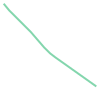

In [162]:
road_line

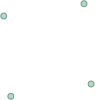

In [163]:
gdf2.loc[sample, "midpoints"]

In [173]:
from shapely.geometry import Point
from shapely.ops import nearest_points

# 初始化变量
shortest_distance = float('inf')  # 初始化为无穷大
nearest_center_point = None  # 最近的点将存储在这里

center_points = gdf2.loc[sample, "midpoints"].geoms # 从MultiPoint中获取所有的点

for point in center_points:
    # 求当前点到道路的最近点（道路上的点）
    nearest_road_point = nearest_points(point, road_line)[1]

    # 计算距离
    distance = point.distance(nearest_road_point)

    # 如果当前距离比记录的距离更短，则更新最短距离和最近的中心点
    if distance < shortest_distance:
        shortest_distance = distance
        nearest_center_point = point

# 输出结果
print(f"最近的中心点是: {nearest_center_point}")
print(f"最短距离是: {shortest_distance}")
print(f'最近的道路点是: {nearest_road_point}')


最近的中心点是: POINT (632175.4186 5806202.752800001)
最短距离是: 16.51552203497222
最近的道路点是: POINT (632184.9900678364 5806216.517023285)


In [174]:
points = nearest_road_point
pointc = nearest_center_point

可视化向量相乘

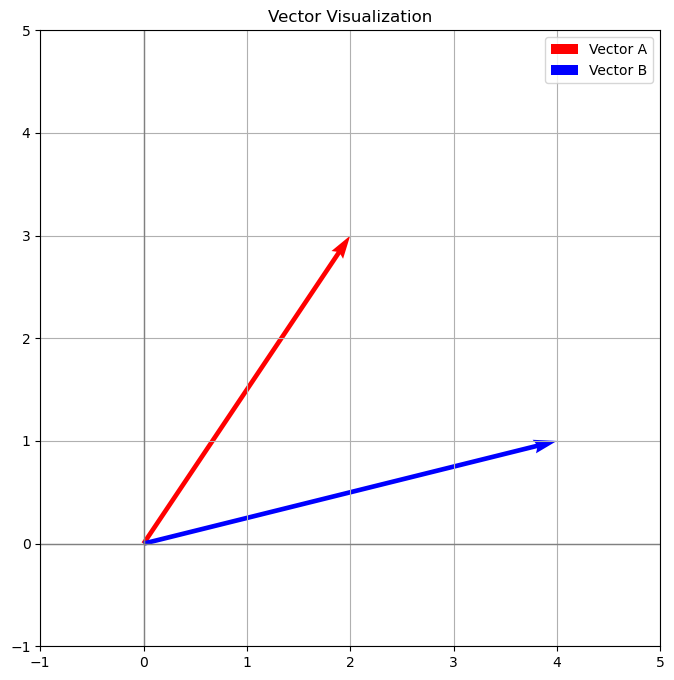

In [214]:
import numpy as np
import matplotlib.pyplot as plt


# Define two vectors
A = np.array([2, 3])
B = np.array([4, 1])

# Plot the vectors
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
plt.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.axvline(x=0, color='grey', lw=1)
plt.axhline(y=0, color='grey', lw=1)
plt.grid(True)
plt.legend()
plt.title('Vector Visualization')
plt.show()

构建计算角度函数

In [178]:
import numpy as np


def calculate_angle(xs, ys, xc, yc):
    # 定义北向量Vn
    Vn = np.array([xs, ys + 1])

    # 定义从点S到点C的向量Vsc
    Vsc = np.array([xc - xs, yc - ys])

    # 计算Vn和Vsc的点积
    dot_product = np.dot(Vn, Vsc)

    # 计算Vn和Vsc的大小（范数）
    norm_Vn = np.linalg.norm(Vn)
    norm_Vsc = np.linalg.norm(Vsc)

    # 计算角度的余弦
    cos_theta = dot_product / (norm_Vn * norm_Vsc)

    # 以度为单位计算角theta的角度
    if (xc - xs) > 0:
        theta = np.degrees(np.arccos(cos_theta))  # 如果角在x轴的正半轴
    else:
        theta = 360 - np.degrees(np.arccos(cos_theta))  # 如果角在x轴的负半轴

    return theta



632184.9900678364 5806216.517023285 632175.4186 5806202.752800001


In [179]:
# 测试一下
xs, ys = points.x, points.y 
xc, yc =  pointc.x, pointc.y  
print(xs, ys, xc, yc)

632184.9900678364 5806216.517023285 632175.4186 5806202.752800001


In [180]:
calculate_angle(xs, ys, xc, yc)

208.60033988006262

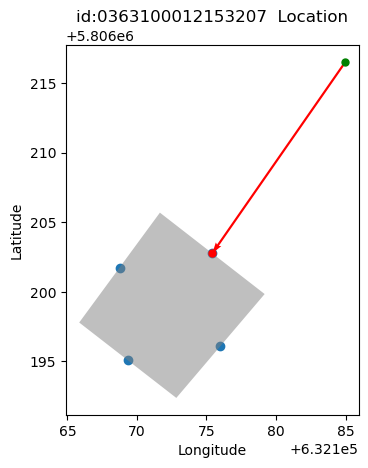

In [211]:
# 和实际结果验证一下绘制结果
import matplotlib.pyplot as plt

# 创建一个图来绘制
fig, ax = plt.subplots()

# 绘制四个中心点
gdf2.loc[[sample], "midpoints"].plot(ax=ax)

# 绘制建筑物
gdf2.loc[[sample], "geometry"].plot(ax=ax, facecolor='gray', alpha=0.5)

# 绘制箭头
ax.quiver(xs, ys, xc - xs, yc - ys, angles='xy', scale_units='xy', scale=1, color='red')
# 绘制中心点
ax.plot(pointc.x, pointc.y, marker='o', color='red', markersize=5)
# 绘制道路上的点
ax.plot(points.x, points.y, marker='o', color='green', markersize=5)


# 设置额外的图形属性，如标题和标签（如果需要）
ax.set_title(f'id:{gdf2.loc[sample, "identificatie"]}  Location')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# 显示图形
plt.show()

In [203]:
type(gdf2.loc[sample, "geometry"])

shapely.geometry.polygon.Polygon

In [198]:
gdf2.loc[sample, "identificatie"]

'0363100012153207'

### 整合上述代码

In [92]:
import geopandas as gpd
import time
import numpy as np
from shapely.geometry import Point, MultiPoint, Polygon, MultiPolygon, LineString, GeometryCollection
from shapely.ops import nearest_points
import pandas as pd
# 定义计算多边形每条边中点的函数
def calculate_midpoints(geometry):
    """根据输入的几何形状（Polygon或MultiPolygon），计算所有边的中点。"""
    midpoints = []

    if isinstance(geometry, Polygon):
        polygons = [geometry]
    elif isinstance(geometry, MultiPolygon):
        polygons = list(geometry.geoms)

    for polygon in polygons:
        coords = list(polygon.exterior.coords)
        midpoints.extend(Point((coords[i][0] + coords[i+1][0])/2, (coords[i][1] + coords[i+1][1])/2) for i in range(len(coords)-1))

    return MultiPoint(midpoints)

# 从文件中读取和处理道路数据
def read_road(road_gdf, building_polygon, buffer):
    """读取道路数据，只保留距离指定建筑物一定距离范围内的部分。"""
    buffered_poly = building_polygon.buffer(buffer)
    road_clip = road_gdf.geometry.intersection(buffered_poly)

    # 过滤掉空的几何形状
    road_nearby = GeometryCollection([geom for geom in road_clip if not geom.is_empty])
    
    return road_nearby if not road_nearby.is_empty else None

# 查找最近点和计算角度
def process_geometry_and_calculate_angle(row, road_gdf, buffer_distance):
    building_polygon = row['geometry']
    midpoints = row['midpoints']  # 这里假设你已经有了一个 'midpoints' 列

    road_nearby = read_road(road_gdf, building_polygon, buffer_distance)

    if road_nearby is None:
        return None  # 或者其他适当的处理

    nearest_center_point, nearest_road_point, shortest_distance = None, None, float('inf')

    for point in midpoints.geoms:
        current_nearest_road_point = nearest_points(point, road_nearby)[1]
        distance = point.distance(current_nearest_road_point)

        if distance < shortest_distance:
            shortest_distance, nearest_center_point, nearest_road_point = distance, point, current_nearest_road_point

    # if shortest_distance > 20:
    #     print("距离太远，不予考虑")
    #     return None  # 或者其他适当的处理

    # 计算角度
    angle = calculate_angle(nearest_road_point.x, nearest_road_point.y, nearest_center_point.x, nearest_center_point.y)
    return {'nearest_point': nearest_center_point, 'angle': angle}  # 根据需要返回相关信息

def calculate_angle(xs, ys, xc, yc):
    """计算两点之间的角度，相对于正北方向。"""
    Vn = np.array([0, 1])  # 北向量
    Vsc = np.array([xc - xs, yc - ys])
    cos_theta = np.dot(Vn, Vsc) / (np.linalg.norm(Vn) * np.linalg.norm(Vsc))
    angle = np.degrees(np.arccos(cos_theta))

    # 调整角度为顺时针方向
    return angle if (xc - xs) >= 0 else 360 - angle

# 使用示例
time1=time.time()
path = r"..\5-ArcgisPro工程\Amsterdam_road.gpkg"
crs = "EPSG:32631"
buffer_distance = 20

# 读取建筑
gdb = "..\\5-ArcgisPro工程\\建筑风格和年代深度学习.gdb"
gdf = gpd.read_file(gdb, layer='Amsterdam_buildings_Project', rows=10) 
gdf['midpoints'] = gdf.geometry.apply(calculate_midpoints)

# 读取道路
road_gdf = gpd.read_file(path, layer="edges").to_crs(crs)[["geometry"]].dropna()

# 修复无效的几何形状
gdf['geometry'] = gdf['geometry'].apply(lambda geom: geom if geom.is_valid else geom.buffer(0))
road_gdf['geometry'] = road_gdf['geometry'].apply(lambda geom: geom if geom.is_valid else geom.buffer(0))


# 为了对每个建筑进行处理，我们将 apply 用于 GeoDataFrame 的每一行。
results = gdf.apply(process_geometry_and_calculate_angle, axis=1, road_gdf=road_gdf, buffer_distance=buffer_distance)

results_df = results.apply(pd.Series)
gdf = pd.concat([gdf, results_df], axis=1)

time2=time.time()
print('总共耗时：' + str(time2 - time1) + 's')

C:\Users\hncdj\anaconda3\envs\dl\Lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
C:\Users\hncdj\anaconda3\envs\dl\Lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
C:\Users\hncdj\anaconda3\envs\dl\Lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
C:\Users\hncdj\anaconda3\envs\dl\Lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
C:\Users\hncdj\anaconda3\envs\dl\Lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
C:\Users\hncdj\anaconda3\envs\dl\Lib\site-packages\shapely\set_operations.py:133: RuntimeW

总共耗时：7.028773546218872s


In [123]:
results = gdf.copy()

In [124]:
# 处理一下数据 我们后一步生成url只需要'identificatie', 'bouwjaar', 'lat', 'lng', 'angle'
# 从'nearest_point'中提取纬度'lat'和经度'lng'
results = results.dropna(subset=['nearest_point'])

In [125]:
results = results[['identificatie', 'bouwjaar', 'angle', 'nearest_point']].rename(columns={'nearest_point': 'geometry'}).set_geometry('geometry')
results.head()

,identificatie,bouwjaar,angle,geometry
1,0363100012061225,1923,37.022415,POINT (628086.000 5808891.976)
2,0363100012061228,2004,219.255104,POINT (635715.801 5802401.949)
3,0363100012062224,1916,87.926628,POINT (632072.166 5803318.911)
4,0363100012063200,1965,356.703373,POINT (628011.519 5798755.970)
5,0363100012062226,2000,70.847657,POINT (624099.948 5808547.137)


In [126]:
results.crs = "EPSG:32631"

In [127]:
results = results.to_crs(epsg=4326)
results.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [128]:
results['lat'] = results.apply(lambda row: row['geometry'].y if pd.notnull(row['geometry']) else None, axis=1)
results['lng'] = results.apply(lambda row: row['geometry'].x if pd.notnull(row['geometry']) else None, axis=1)

In [129]:
# 为了后续处理进行坐标转换
results.head()

,identificatie,bouwjaar,angle,geometry,lat,lng
1,0363100012061225,1923,37.022415,POINT (4.88333 52.41524),52.415235,4.883329
2,0363100012061228,2004,219.255104,POINT (4.99281 52.35508),52.355083,4.992815
3,0363100012062224,1916,87.926628,POINT (4.93971 52.36421),52.364212,4.939707
4,0363100012063200,1965,356.703373,POINT (4.87837 52.32418),52.324175,4.878366
5,0363100012062226,2000,70.847657,POINT (4.82462 52.41306),52.413056,4.824624


In [130]:
results[['identificatie', 'bouwjaar', 'lat', 'lng', 'angle']].head()

,identificatie,bouwjaar,lat,lng,angle
1,0363100012061225,1923,52.415235,4.883329,37.022415
2,0363100012061228,2004,52.355083,4.992815,219.255104
3,0363100012062224,1916,52.364212,4.939707,87.926628
4,0363100012063200,1965,52.324175,4.878366,356.703373
5,0363100012062226,2000,52.413056,4.824624,70.847657


In [133]:
# 保存为csv
results[['identificatie', 'bouwjaar', 'lat', 'lng', 'angle']].to_csv("../data/output/Amsterdam_buildings_Project_use_geopandas.csv", index=False, header=True)

## 5.使用ArcgisPro处理建筑并获取中心点

## 分步骤解释：

### 1.简化建筑物
https://pro.arcgis.com/zh-cn/pro-app/3.0/tool-reference/cartography/simplify-building.htm

![示意图](https://image-1315363329.cos.ap-shanghai.myqcloud.com/lessons/202310170935112.png)

代码：'arcpy.cartography.SimplifyBuilding(in_features, out_feature_class, simplification_tolerance, {minimum_area}, {conflict_option}, {in_barriers}, {collapsed_point_option})'

In [44]:
import arcpy
arcpy.cartography.SimplifyBuilding("Amsterdam_buil_0363100012061237", 
                                   "single_building_SimplifyBuild", 
                                   "3 Meters", None, "NO_CHECK", None, "NO_KEEP")

<Result 'C:\\Users\\hncdj\\Documents\\Python_\\Python辅助城市研究\\建筑风格和年代机器学习\\5-ArcgisPro工程\\建筑风格和年代深度学习.gdb\\single_building_SimplifyBuild'>

### 2.获取建筑物的边上的中点

In [45]:
import arcpy

# 输入的多边形要素类
input_polygon_feature_class = "single_building_SimplifyBuild" # "single_building" # "Amsterdam_buildings_Project"


In [46]:
# 定义SpatialReference对象，这里以WGS 1984坐标系为例
sr = arcpy.SpatialReference(32631)

# 使用SearchCursor遍历多边形
with arcpy.da.SearchCursor(input_polygon_feature_class, ["identificatie", "SHAPE@"]) as cursor:
    for row in cursor:

        polygon_id = row[0] # 建筑的id
        polygon = row[1]
        
        
        # 创建一个Array
        point_array = arcpy.Array()
        
        # 遍历多边形的每一段，计算并存储中心点
        # 遍历poly中所有的多边形，part为每个单独的多边形
        for part in polygon: 
            # 遍历每个边
            for i in range(len(part) - 1):
                start_point = part[i]
                end_point = part[i + 1]
                mid_x = (start_point.X + end_point.X) / 2
                mid_y = (start_point.Y + end_point.Y) / 2
                print(mid_x, mid_y)
                
                # 创建arcpy的点
                midpoint = arcpy.Point(mid_x, mid_y)
                
                # 添加到Array
                point_array.add(midpoint)
                
            # 使用Array创建Multipoint对象
            multipoint = arcpy.Multipoint(point_array, sr)


626666.8219000003 5799563.76475
626661.8779500001 5799559.9069
626656.6625000001 5799565.5102
626663.25 5799571.4521
626670.24835 5799569.61565
626668.6048000003 5799567.5316


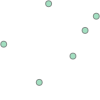

In [47]:
multipoint

In [48]:
# 保存Multipoint对象
arcpy.CopyFeatures_management(multipoint, "multipoint")

<Result 'C:\\Users\\hncdj\\Documents\\Python_\\Python辅助城市研究\\建筑风格和年代机器学习\\5-ArcgisPro工程\\建筑风格和年代深度学习.gdb\\multipoint'>

### 3.从每个点找到距离周围道路最近的点Point C，以及Point S，heading值

In [49]:
mid_x, mid_y

(626668.6048000003, 5799567.5316)

In [50]:
# 邻近分析 (分析)
in_features = "multipoint"
near_features = "main.edges"
search_radius = "25 Meters"
arcpy.analysis.Near(in_features, 
                    near_features, 
                    "25 Meters", "LOCATION", "ANGLE", "PLANAR", "NEAR_FID NEAR_FID;NEAR_DIST NEAR_DIST;NEAR_X NEAR_X;NEAR_Y NEAR_Y;NEAR_ANGLE NEAR_ANGLE")

<Result 'multipoint'>

In [51]:
in_features

'multipoint'

In [52]:
fields = arcpy.ListFields(in_features)
for field in fields:
    print(field.name)

OBJECTID
Shape
NEAR_FID
NEAR_DIST
NEAR_X
NEAR_Y
NEAR_ANGLE


### 4.将angle转为heading的角度
生成的角度是输入要素（建筑物上的点）对于邻近要素（街道上的点）的角度，并且转换前的角度的表示方式是：在方法参数中使用平面方法时，角度在 -180° 到 180° 的范围内，0°代表东，90°代表北，180°（或 -180°）代表西，-90° 代表南。
转换后，因为要获取街道街景，要以（街道上的点）为原点，对于建筑物上的点的角度，并且角度表示为：角度范围在0-360度，0°代表北，90°代表东，180°代表南，270° 代表西。

In [53]:
def transform_angle(xs, ys, xc, yc):
    """
    方式一：计算向量转换角度的表示方式，从输入要素（建筑物上的点）对于邻近要素（街道上的点）的角度，
    到以邻近要素（街道上的点）为原点，对于输入要素（建筑物上的点）的角度。
    并确保角度在0-360度之间。
    """
    # 计算向量
    Vsc = np.array([xc - xs, yc - ys])
    
    # 计算与正东方向的角度（由于数学上的约定，这里的0°是指向东的）
    angle_rad = np.arctan2(Vsc[1], Vsc[0])  # 这里得到的结果范围是 -π 到 π (-180° 到 180°)

    # 将弧度转换为角度
    angle_deg = np.degrees(angle_rad)
    
    # 转换为罗盘式角度（北0°，东90°...）
    # 由于原始0°指向东，我们需要将角度逆时针旋转90°来让0°指向北
    compass_angle = (90 - angle_deg) % 360  # 通过取余数确保结果在0° - 360°范围内

    return compass_angle

print( transform_angle(xs, ys, xc, yc))

In [59]:
def transform_angle(original_angle):
    """
    将角度从一个坐标系转换为另一个，并更改方向表示。

    :param original_angle: 初始的角度（基于东为0°的系统）
    :return: 转换后的角度（基于北为0°的系统）
    """
    # 从建筑物到街道的角度需要将角度旋转180度以“反转”方向
    reversed_angle = original_angle + 180

    # 规范化角度在0到360之间
    if reversed_angle >= 360:
        reversed_angle -= 360
    elif reversed_angle < 0:
        reversed_angle += 360

    # 现在，我们需要将“东为0度”转变为“北为0度”，这需要一个90度的逆时针旋转
    north_based_angle = reversed_angle + 90

    if north_based_angle >= 360:
        north_based_angle -= 360

    return north_based_angle

print(transform_angle(-178.9227630675157))

91.07723693248431


In [60]:
# 定义要查询的字段
field_name_list = ["NEAR_DIST","NEAR_X","NEAR_Y", "NEAR_ANGLE"]


# 使用SearchCursor迭代访问每个记录
with arcpy.da.SearchCursor(in_features, field_name_list) as cursor:
    for row in cursor:
        # 获取NEAR_ANGLE字段的值并添加到列表中
        print([i for i in row])
        angle = row[3]
        angle2 = transform_angle(angle)
        print("转换后的角度",angle2)

# 打印所有的NEAR_ANGLE值
print("当前建筑的id", polygon_id)

[15.729911607404052, 626640.935368494, 5799565.214474143, -178.9227630675157]
转换后的角度 91.07723693248431
当前建筑的id 0363100012061237


In [61]:
# 追加保存到json文件，然后通过streetview进行构建url的操作
import pandas as pd

# 从字典创建 DataFrame
df = pd.DataFrame({
    "polygon_id": [polygon_id],  
    "NEAR_DIST": [row[0]],      
    "lat": [row[2]],            
    "lng": [row[1]],
    "heading": [angle]
})


# 追加数据到 CSV
df.to_csv("./temp.csv", mode='a', header=False, index=False)


In [ ]:
# # 将heading（NEAR_ANGLE）,经纬度，保存到input_polygon_feature_class：single_building
# with arcpy.da.UpdateCursor(input_polygon_feature_class, ["identificatie","SHAPE@",]) as cursor:
#     for row in cursor:
#         # 对每一行进行某种操作...
        
#         # 示例：修改 'identificatie' 字段的值
#         row[1] = "新的值"  # 更新 'identificatie' 到新的值
        
#         # 保存更改
#         cursor.updateRow(row)


## 整合上述代码：遍历building然后查询临近点

In [65]:
import arcpy
import pandas as pd
# 输入的多边形要素类
input_polygon_feature_class = "Amsterdam_buil_ExportFeature1_98" # "single_building" # "Amsterdam_buildings_Project"


# 整合代码
# 定义SpatialReference对象，这里以WGS 1984坐标系为例
sr = arcpy.SpatialReference(32631)


def field_exists(feature_class, field_name):
    """检查给定的字段是否存在于指定的要素类中"""
    fields = [f.name for f in arcpy.ListFields(feature_class)]
    return field_name in fields

 def transform_angle(original_angle):
    """
    将角度从一个坐标系转换为另一个，并更改方向表示。

    :param original_angle: 初始的角度（基于东为0°的系统）
    :return: 转换后的角度（基于北为0°的系统）
    """
    # 从建筑物到街道的角度需要将角度旋转180度以“反转”方向
    reversed_angle = original_angle + 180

    # 规范化角度在0到360之间
    if reversed_angle >= 360:
        reversed_angle -= 360
    elif reversed_angle < 0:
        reversed_angle += 360

    # 现在，我们需要将“东为0度”转变为“北为0度”，这需要一个90度的逆时针旋转
    north_based_angle = reversed_angle + 90

    if north_based_angle >= 360:
        north_based_angle -= 360

    return north_based_angle

# 定义要查询的字段
field_name_list =  ["NEAR_DIST","NEAR_X","NEAR_Y", "NEAR_ANGLE"]

# 用于检查邻域分析是否成功
field_to_check = field_name_list[0]

# 使用SearchCursor遍历多边形
with arcpy.da.SearchCursor(input_polygon_feature_class, ["identificatie", "SHAPE@"]) as cursor:
    for row in cursor:
        polygon_id = row[0] # 建筑的id
        polygon = row[1]
        
        # 创建一个Array
        point_array = arcpy.Array()
        
        # 遍历多边形的每一段，计算并存储中心点
        # 遍历poly中所有的多边形，part为每个单独的多边形
        for part in polygon: 
            # 遍历每个边
            for i in range(len(part) - 1):
                start_point = part[i]
                end_point = part[i + 1]
                mid_x = (start_point.X + end_point.X) / 2
                mid_y = (start_point.Y + end_point.Y) / 2
                # print(mid_x, mid_y)
                
                # 创建arcpy的点
                midpoint = arcpy.Point(mid_x, mid_y)
                
                # 添加到Array
                point_array.add(midpoint)
                
            # 使用Array创建Multipoint对象
            multipoint = arcpy.Multipoint(point_array, sr)

            arcpy.CopyFeatures_management(multipoint, "multipoint")
            
            # 邻近分析 (分析)
            in_features = "multipoint"
            near_features = "main.edges"
            arcpy.analysis.Near(in_features, 
                                near_features, 
                                "25 Meters", "LOCATION", "ANGLE", "GEODESIC", "NEAR_FID NEAR_FID;NEAR_DIST NEAR_DIST;NEAR_X NEAR_X;NEAR_Y NEAR_Y;NEAR_ANGLE NEAR_ANGLE")
            
            
            if field_exists(in_features, field_to_check):
                # 使用SearchCursor迭代访问每个记录
                with arcpy.da.SearchCursor(in_features, field_name_list) as cursor:
                    for row in cursor:
                        # 删除NEAR_DIST=-1的数据
                        NEAR_DIST = row[0]

                        
                        angle = transform_angle(row[3])

                        # 打印所有的NEAR_ANGLE值
                        print("当前建筑的id", polygon_id)


                # 保存
                if NEAR_DIST !=-1:
                
                    # 从字典创建 DataFrame
                    df = pd.DataFrame({
                        "polygon_id": [polygon_id],  
                        "NEAR_DIST": [row[0]],      
                        "lat": [row[2]],            
                        "lng": [row[1]],
                        "heading": [angle]
                    })


                    # 追加数据到 CSV
                    df.to_csv("./temp.csv", mode='a', header=False, index=False)


            else:
                print(f"Field '{field_to_check}' does not exist in {in_features}.")



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 17)

## 优化代码逻辑(从这开始时正式执行代码)
为了提高上述代码的执行速度，我们可以考虑以下策略：
减少I/O操作: 代码中有多次磁盘I/O操作，特别是与arcpy和pandas相关的部分。I/O操作通常是时间消耗的关键所在。
使用多线程/多进程: 但需要注意的是**arcpy不是线程安全的，所以多线程可能并不总是有效。**另外，你的代码涉及到GIS数据的写入，这也可能导致多线程中出现资源争用的问题。
我们可以创建一个列表来存储数据，而不是每次都将其追加到CSV。在整个循环完成后，我们再保存这个列表到CSV。

## 对比一下两种方法的结果

In [3]:
import pandas as pd
# 读取方法1
df_1 = pd.read_csv("../data/output/Points_Amsterdam_use_gpd_all.csv", header=0)
df_1.head()

,identificatie,bouwjaar,lat,lng,angle
0,363100012061225,1923,52.415235,4.883329,37.022415
1,363100012061228,2004,52.355083,4.992815,219.255104
2,363100012062224,1916,52.364212,4.939707,87.926628
3,363100012063200,1965,52.324175,4.878366,356.703373
4,363100012062226,2000,52.413056,4.824624,70.847657


In [ ]:
# # 读取方法2
# 
# df_2 = pd.read_csv("xxxx", names=["identificatie", "bouwjaar", "distance", "lat", "lng",'angle'], header=None).drop(0, axis=0).drop("distance", axis=1)
# df_2.head()

In [ ]:
# # 随机几个点对比一下
# print(" ", df_1.sample(5))
# 
# 
# for i in df_1.identificatie.tolist():
#     print("id:", i)
#     if i in df_2.identificatie.tolist():
#         print("--------------")
#         print("方法1 angle:", df_1[df_1.loc[:, "identificatie"] == i])
#         print("方法2 angle:", df_2[df_2.loc[:, "identificatie"] == i])
#     else:
#         pass
#         # print("方法2中不存在")

In [ ]:
# # 看看他们的街景url
# i = '363100012062908'
# df_1[df_1."identificatie"] == i]